In [569]:
import pandas as pd
import numpy as np

In [570]:
flight_train=pd.read_excel('Data_Train.xlsx')
flight_test=pd.read_excel('Test_set.xlsx')

In [571]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [572]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [573]:
flight_test[flight_test['Airline']=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2671,Trujet,16/04/2019,Mumbai,Hyderabad,BOM → NDC → HYD,15:30,18:45,3h 15m,1 stop,No info


#### Checking for NULL values(In this case only one value is null in route and total_stops,so we can drop these rows)

In [574]:
print('Train Data Null Check')
print('----------------------')
print(flight_train.isnull().sum())
print('-------------------------')
print('Test Data Null Check')
print('----------------------')
print(flight_test.isnull().sum())

Train Data Null Check
----------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
-------------------------
Test Data Null Check
----------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [575]:
flight_train=flight_train.dropna().reset_index() ##deleting null value rows
flight_train.drop('index',1,inplace=True)

# EDA & Feature Engineering

In [576]:
###Train Data

flight_train['Journey_month']=pd.to_datetime(flight_train['Date_of_Journey'],format="%d/%m/%Y").dt.month ###extracting month 
flight_train['Journey_day']=pd.to_datetime(flight_train['Date_of_Journey'],format="%d/%m/%Y").dt.day ###extracting year 
flight_train.drop('Date_of_Journey',1,inplace=True) 

###Test Data
flight_test['Journey_month']=pd.to_datetime(flight_test['Date_of_Journey'],format="%d/%m/%Y").dt.month ###extracting month 
flight_test['Journey_day']=pd.to_datetime(flight_test['Date_of_Journey'],format="%d/%m/%Y").dt.day ###extracting year 
flight_test.drop('Date_of_Journey',1,inplace=True) 

In [577]:
###Train Data

flight_train['Dep_hour']=flight_train['Dep_Time'].str.split(':',expand=True)[0] ###extracting hour
flight_train['Dep_hour']=flight_train['Dep_hour'].astype(int)
flight_train['Dep_min']=flight_train['Dep_Time'].str.split(':',expand=True)[1] ###extracting minutes
flight_train['Dep_min']=flight_train['Dep_min'].astype(int)
flight_train.drop('Dep_Time',1,inplace=True)


###Test Data

flight_test['Dep_hour']=flight_test['Dep_Time'].str.split(':',expand=True)[0] ###extracting hour
flight_test['Dep_hour']=flight_test['Dep_hour'].astype(int)
flight_test['Dep_min']=flight_test['Dep_Time'].str.split(':',expand=True)[1] ###extracting minutes
flight_test['Dep_min']=flight_test['Dep_min'].astype(int)
flight_test.drop('Dep_Time',1,inplace=True)

In [578]:
###Train Data

flight_train['Arrival_hour']=pd.to_datetime(flight_train['Arrival_Time']).dt.hour ###extracting hour
flight_train['Arrival_min']=pd.to_datetime(flight_train['Arrival_Time']).dt.minute ###extracting minutes
flight_train.drop(['Arrival_Time'],1,inplace=True)

###Test Data

flight_test['Arrival_hour']=pd.to_datetime(flight_test['Arrival_Time']).dt.hour ###extracting hour
flight_test['Arrival_min']=pd.to_datetime(flight_test['Arrival_Time']).dt.minute ###extracting minutes
flight_test.drop(['Arrival_Time'],1,inplace=True)

In [579]:
#Train Data

flight_train['duration_hour']=flight_train['Duration'].str.split('h',expand=True)[0]  ###extracting hour
flight_train['Duration_min']=flight_train['Duration'].str.split('h',expand=True)[1].str.replace('m','').str.strip()  ###extracting minutes
flight_train['Duration_min']=flight_train['Duration_min'].replace('',00)
flight_train.drop('Duration',1,inplace=True)


#Test Data

flight_test['duration_hour']=flight_test['Duration'].str.split('h',expand=True)[0]  ###extracting hour
flight_test['Duration_min']=flight_test['Duration'].str.split('h',expand=True)[1].str.replace('m','').str.strip()  ###extracting minutes
flight_test['Duration_min']=flight_test['Duration_min'].replace('',00)
flight_test.drop('Duration',1,inplace=True)

In [580]:
#Train Data

duration_hour_train=list(flight_train['duration_hour'])
Duration_min_train=list(flight_train['Duration_min'])

for i in range(len(duration_hour_train)):
    if 'm' in duration_hour_train[i]:
        Duration_min_train[i]=duration_hour_train[i].replace('m','')
        duration_hour_train[i]=0

flight_train['duration_hour']=duration_hour_train
flight_train['Duration_min']=Duration_min_train
flight_train['duration_hour']=flight_train['duration_hour'].astype(int)
flight_train['Duration_min']=flight_train['Duration_min'].astype(int)


#Test Data
duration_hour_test=list(flight_test['duration_hour'])
Duration_min_test=list(flight_test['Duration_min'])

for i in range(len(duration_hour_test)):
    if 'm' in duration_hour_test[i]:
        Duration_min_test[i]=duration_hour_test[i].replace('m','')
        duration_hour_test[i]=0

flight_test['duration_hour']=duration_hour_test
flight_test['Duration_min']=Duration_min_test
flight_test['duration_hour']=flight_test['duration_hour'].astype(int)
flight_test['Duration_min']=flight_test['Duration_min'].astype(int)

#### Route column and Total_Stops Column have similar meaning(so we can drop route and assign numbers on Total_Stops colum

In [581]:
flight_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [582]:
map1={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}### making dictionary for mapping further in DF

In [583]:
#Train Data
flight_train['Total_Stops']=flight_train['Total_Stops'].map(map1)
flight_train.drop('Route',1,inplace=True)

#Test Data
flight_test['Total_Stops']=flight_test['Total_Stops'].map(map1)
flight_test.drop('Route',1,inplace=True)

In [584]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


In [585]:
flight_train['Additional_Info'].value_counts() #### here most of the values doesnt have any info(so dropping this column)

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [586]:
##Train Data
flight_train.drop('Additional_Info',1,inplace=True)

#Test Data
flight_test.drop('Additional_Info',1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

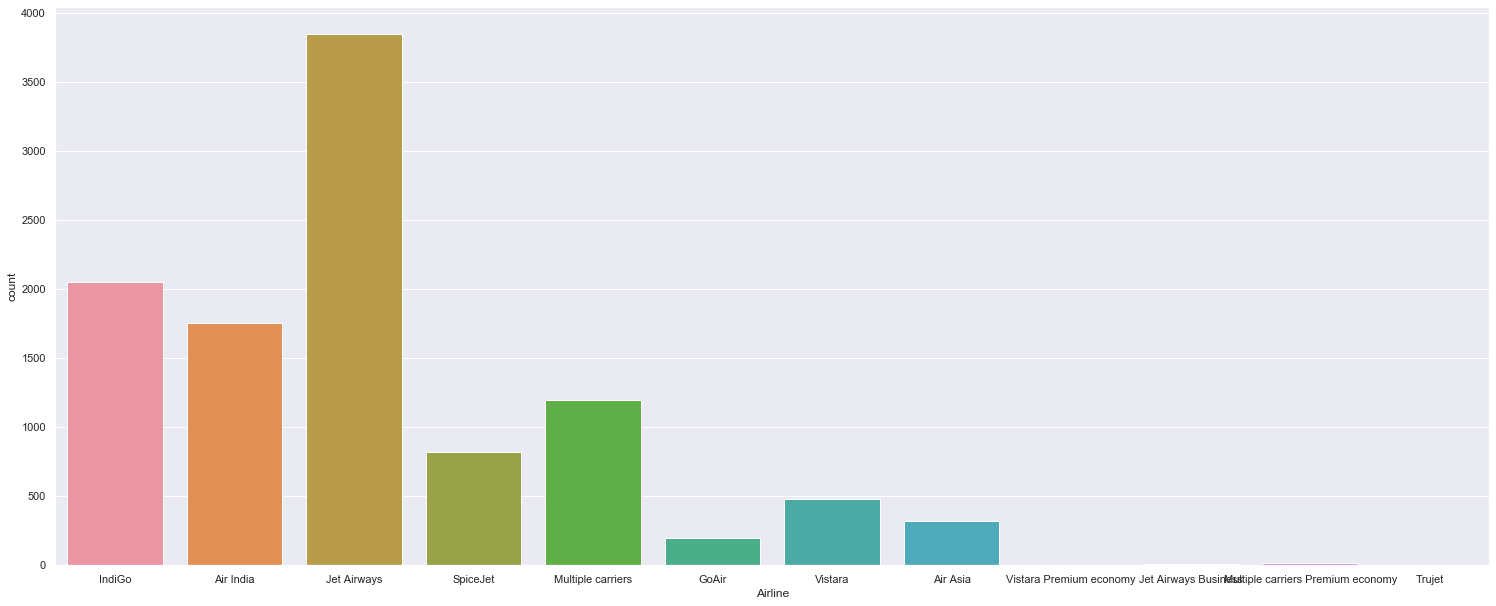

In [587]:
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(flight_train['Airline']) ###Jet Airways have the highest record 

<IPython.core.display.Javascript object>

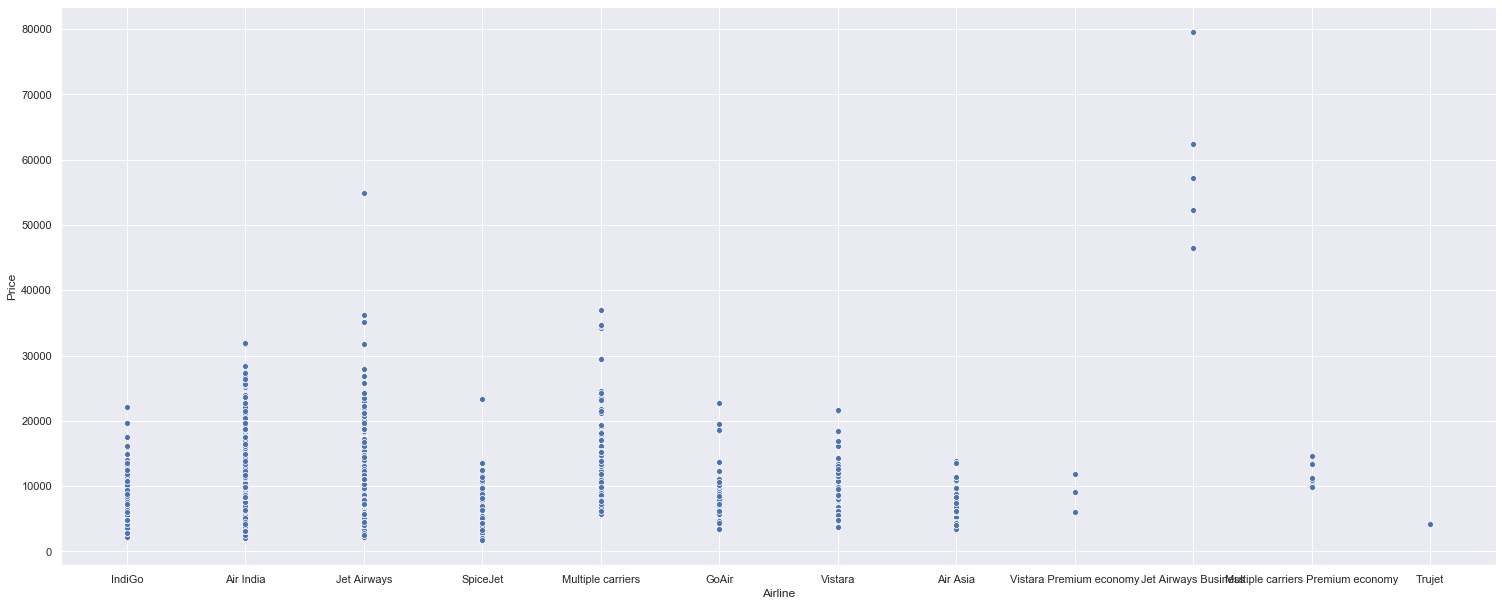

In [588]:
sns.scatterplot(flight_train['Airline'],flight_train['Price']) ### Jet Airways business class have higher price but the Count is less

<IPython.core.display.Javascript object>

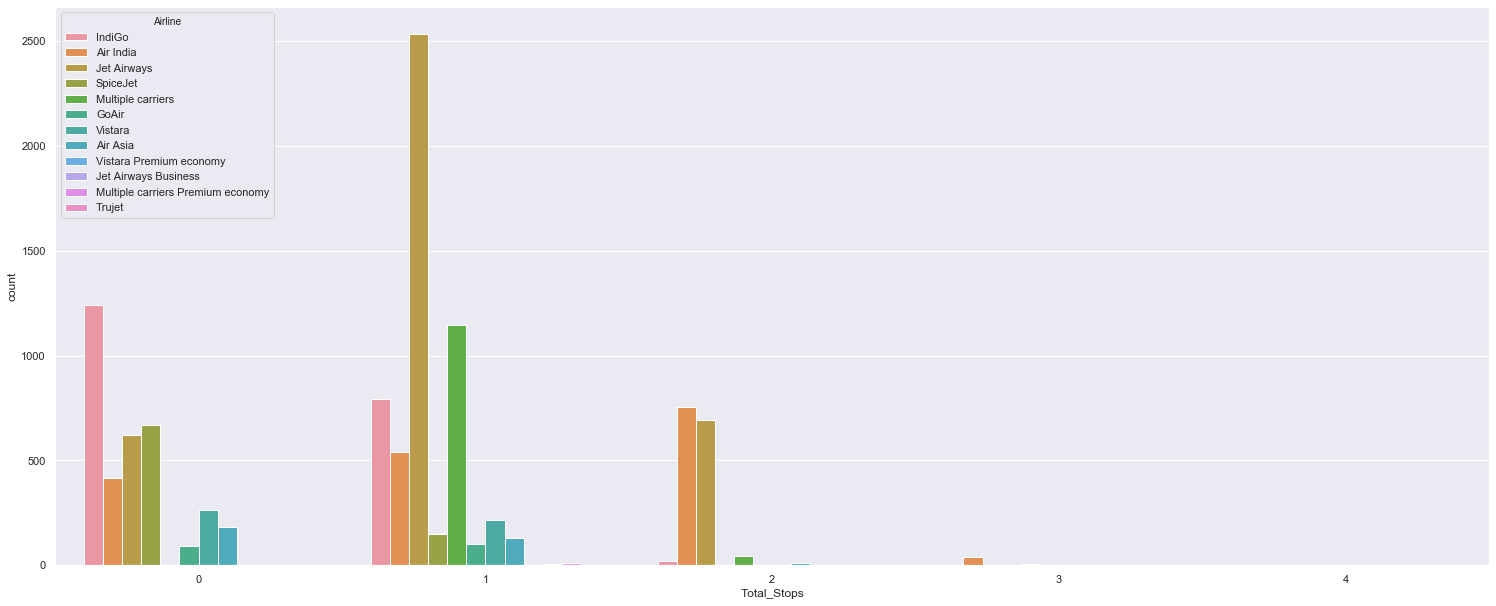

In [589]:

sns.countplot(flight_train['Total_Stops'],hue=flight_train['Airline']) ###These are the total Stops made by each Airline

# Categorical Data Handling

In [590]:
#Train Data
cat_cols_train=flight_train.select_dtypes('object').columns

#Test Data
cat_cols_test=flight_test.select_dtypes('object').columns

In [591]:
for cols in cat_cols_train:
    print('\n',cols)
    print('--------------------------\n')
    print(flight_train[cols].value_counts())
    


 Airline
--------------------------

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

 Source
--------------------------

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

 Destination
--------------------------

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [592]:
#Train Data
for cols in cat_cols_train:
    
    dummy=pd.get_dummies(flight_train[cols],drop_first=True,prefix=cols)
    flight_train=pd.concat([flight_train,dummy],1)
    del flight_train[cols]
    
#Test Data
for cols in cat_cols_test:
    dummy=pd.get_dummies(flight_test[cols],drop_first=True,prefix=cols)
    flight_test=pd.concat([flight_test,dummy],1)
    del flight_test[cols]

### Dividing Train Part into Train & Test

In [607]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

In [594]:
train,test=train_test_split(flight_train,test_size=0.3)
x_train=train.drop('Price',1)
x_test=train['Price']

y_train=test.drop('Price',1)
y_test=test['Price']

## Training Model(Linear Regression)

In [595]:
model=Ridge(fit_intercept=True)

In [596]:
params={'alpha':np.linspace(0.01,30,100)}

In [597]:
GridSearch=GridSearchCV(model,cv=10,param_grid=params,scoring='neg_mean_absolute_error',verbose=2,n_jobs=-1)

In [598]:
GridSearch.fit(x_train,x_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 3.12929293e-01, 6.15858586e-01, 9.18787879e-01,
       1.22171717e+00, 1.52464646e+00, 1.82757576e+00, 2.13050505e+00,
       2...
       2.42443434e+01, 2.45472727e+01, 2.48502020e+01, 2.51531313e+01,
       2.54560606e+01, 2.57589899e+01, 2.60619192e+01, 2.63648485e+01,
       2.66677778e+01, 2.69707071e+01, 2.72736364e+01, 2.75765657e+01,
       2.78794949e+01, 2.81824242e+01, 2.84853535e+01, 2.87882828e+01,
       2.90912121e+01, 2.93941414e+01, 2.96970707e+01, 3.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=2)

In [599]:
GridSearch.best_estimator_

Ridge(alpha=0.31292929292929295, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [600]:
RM=GridSearch.best_estimator_

In [601]:
Validation_prediction=RM.predict(y_train)

In [602]:
from sklearn.metrics import mean_absolute_error

In [603]:
mean_absolute_error(Validation_prediction,y_test)

1945.6269238862592

In [605]:
model2=RandomForestRegressor()

In [613]:
param2={'n_estimators':[100,200,400,500,700],
       'max_depth':[3,6,7,9,11],
       'max_features':[2,5,7,11,15,22],
       'min_samples_split':[2,4,5,7,8],
       'min_samples_leaf':[2,3,5,6],
       'criterion':['gini'],
       'criterion':['mae','mse']}

In [614]:
Random_Search=RandomizedSearchCV(model2,cv=10,param_distributions=param2,n_iter=50,n_jobs=-1,verbose=2,scoring='neg_mean_absolute_error')

In [615]:
Random_Search.fit(x_train,x_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 77.4min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [617]:
RFR=Random_Search.best_estimator_

In [618]:
validation_prediction=RFR.predict(y_train)

In [619]:
mean_absolute_error(y_test,validation_prediction)

1191.4615109393103

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

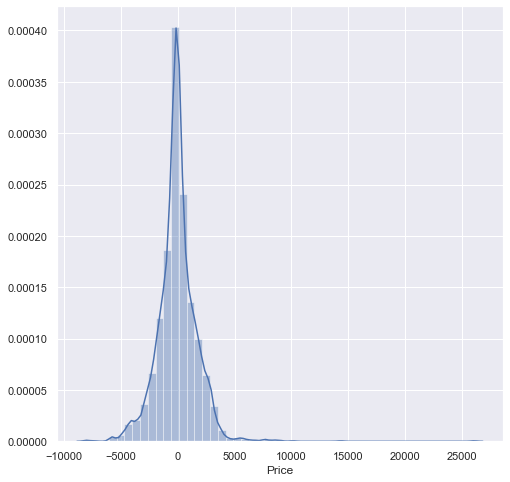

In [621]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-validation_prediction)
plt.show()

In [623]:
import pickle
# open a file, where you ant to store the data
file = open('RandForest.pkl', 'wb')

# dump information to that file
pickle.dump(RFR, file)